In [1]:
import numpy as np
import matplotlib.pyplot as plt
import colorstamps

Text(0.5, 0, '$\\omega$')

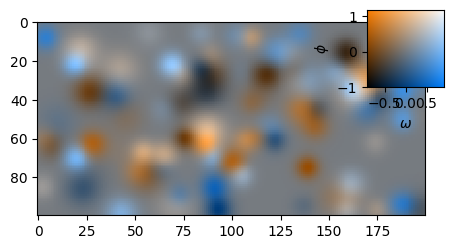

In [2]:
my_cmap = np.zeros((256,256,3))
my_cmap[:,:,0] = np.linspace(0,1,256)[:,np.newaxis]
my_cmap[:,:,2] = np.linspace(0,1,256)[np.newaxis,:]
my_cmap[:,:,1] = 0.5*(my_cmap[:,:,0]+my_cmap[:,:,2])

img = colorstamps.helpers.get_random_data() # numpy array of shape (100,200,2) with 2d data to plot    
fig, ax = plt.subplots(1,1,figsize=(5,3), dpi = 100)    
rgb, stamp = colorstamps.apply_stamp(img[:,:,0], img[:,:,1], my_cmap)

ax.imshow(rgb, interpolation = 'nearest')
overlaid_ax = stamp.overlay_ax(ax, lower_left_corner = [0.66,0.85], width = 0.2)
overlaid_ax.set_ylabel(r'$\phi$')
overlaid_ax.set_xlabel(r'$\omega$')


/home/trygvrad/.local/lib/python3.8/site-packages/colorspacious/ciecam02.py:397: RuntimeWarning: invalid value encountered in power
  * ((27.13 * np.abs(RGBprime_a - 0.1))


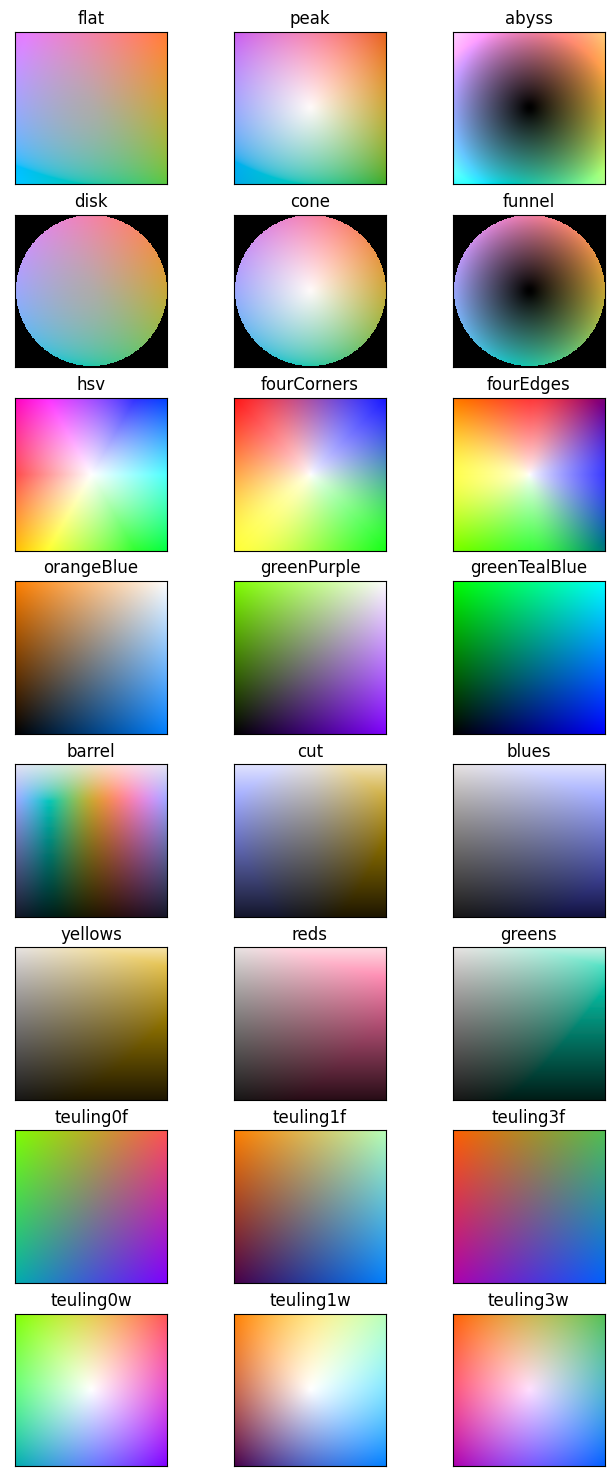

In [3]:
names = ['flat',  'peak', 'abyss', 
         'disk','cone','funnel', 
         'hsv', 'fourCorners', 'fourEdges',
         'orangeBlue', 'greenPurple', 'greenTealBlue', 
         'barrel', 'cut', 'blues', 
         'yellows', 'reds', 'greens',
         'teuling0f', 'teuling1f', 'teuling3f',
         'teuling0w', 'teuling1w', 'teuling3w']

fig, axes = plt.subplots(8,3, figsize = (8,19), dpi = 100)
axes = axes.ravel()

for i, name in enumerate(names):
    cmap = colorstamps.stamps.get_cmap(name)
    axes[i].imshow(cmap, origin = 'lower')
    axes[i].set_title(name)

    
for ax in axes:
        ax.set_xticks([])
        ax.set_yticks([])
fig.patch.set_facecolor('white')


In [ ]:
import matplotlib.pyplot as plt
#import colorstamps

img = colorstamps.helpers.get_random_data() # numpy array of shape (100,200,2) with 2d data to plot    
rgb, stamp = colorstamps.apply_stamp(img[:,:,0], img[:,:,1], 'peak',
                                   vmin_0 = -1.2, vmax_0 = 1.2,
                                   vmin_1 = -1, vmax_1 = 1,
                                 )

fig, axes = plt.subplots(1,2,figsize=(10,3), dpi = 100)    
axes[0].imshow(rgb)

# show colormap as overlay
overlaid_ax = stamp.overlay_ax(axes[0], lower_left_corner = [0.7,0.85], width = 0.2)
overlaid_ax.set_ylabel(r'$\phi$')
overlaid_ax.set_xlabel(r'$\omega$')

# also show colormap as in separate ax to illustrate functionality
stamp.show_in_ax(axes[1])
axes[1].set_ylabel(r'$\phi$')
axes[1].set_xlabel(r'$\omega$')


In [ ]:

stamp = colorstamps.stamp('peak')
fig, ax = stamp.eval()
stamp = colorstamps.stamp('hsv')
fig, ax = stamp.eval()
stamp = colorstamps.stamp('fourEdges')
fig, ax = stamp.eval()


In [ ]:
n = int(np.sqrt(len(colorstamps.stamps.mpl_cmaps)))+1
fig, axes = plt.subplots(n,n, figsize = (40,40))
axes = axes.ravel()

for i, name in enumerate(colorstamps.stamps.mpl_cmaps):
    cmap = colorstamps.stamps.get_2dcmap_from_mpl(name, l = 64, limit_sat = 'individual')
    axes[i].imshow(cmap)
    axes[i].set_title(name)
    axes[i].invert_yaxis()
    
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
    
fig.patch.set_facecolor('white')



In [ ]:
fig, axes = plt.subplots(4,5, figsize = (20,15))

cmaps = ['hsv', 'fourCorners', 'cone', 'barrel']

for i, ax_row in enumerate(axes):
    stamp = colorstamps.stamp(cmaps[i])
    stamp.eval(axes = ax_row)
fig.patch.set_facecolor('white')



In [ ]:
s = 100
t = 200
img = np.zeros((s,t,2))
x_r = np.arange(s)
y_r = np.arange(t)

np.random.seed(0)
for i in range(100):
    x = int(np.random.random()*s)
    y = int(np.random.random()*t)
    z = 1*np.random.random()
    sigma = 0.02*(np.random.random()+0.5)
    ang = 2*np.pi*np.random.random()
    
    img[:,:,0] += z*np.sin(ang)*np.exp(-sigma*((x-x_r[:,np.newaxis])**2+(y-y_r[np.newaxis,:])**2))
    img[:,:,1] += z*np.cos(ang)*np.exp(-sigma*((x-x_r[:,np.newaxis])**2+(y-y_r[np.newaxis,:])**2))

    
rgb, stamp = colorstamps.apply_stamp(img[:,:,0],img[:,:,1], 'cone', #a = (-1,1), b = (-0,1), 
                                  rot = 180, clip = None, vmin = -1, vmax = 1)

save_stamp = stamp
fig, axes = plt.subplots(3,2,figsize=(10,7.5), dpi = 300)    
axes = axes.ravel()

axes[0].imshow(rgb, interpolation = 'nearest')
stamp.overlay_ax(axes[0], lower_left_corner = [0.66,0.85], width = 0.2)

rgb, stamp = colorstamps.apply_stamp(img[:,:,0],img[:,:,1],'hsv', vmin = -1, vmax = 1)
axes[1].imshow(rgb)
stamp.overlay_ax(axes[1], lower_left_corner = [0.66,0.85], width = 0.2)


rgb, stamp = colorstamps.apply_stamp(img[:,:,0],img[:,:,1],'viridis', clip = None, vmin = -1, vmax = 1, limit_sat = 'shared')
axes[2].imshow(rgb)
stamp.overlay_ax(axes[2], lower_left_corner = [0.66,0.85], width = 0.2)

rgb, stamp = colorstamps.apply_stamp(img[:,:,0],img[:,:,1],'barrel', vmin = -1, vmax = 1, limit_sat = 'shared')
axes[3].imshow(rgb)
stamp.overlay_ax(axes[3], lower_left_corner = [0.66,0.85], width = 0.2)

rgb, stamp = colorstamps.apply_stamp(img[:,:,0],img[:,:,1],'fourEdges', vmin = -1, vmax = 1, limit_sat = 'shared')
axes[4].imshow(rgb)
stamp.overlay_ax(axes[4], lower_left_corner = [0.66,0.85], width = 0.2)

rgb, stamp = colorstamps.apply_stamp(img[:,:,0],img[:,:,1],'cut', sat = 40, rot = 0, vmin = -1, vmax = 1, limit_sat = 'shared')
axes[5].imshow(rgb)
stamp.overlay_ax(axes[5], lower_left_corner = [0.66,0.85], width = 0.2)


In [ ]:
l = 256
a = (-0.3,1)
b = (-0.3,1)
ar = np.linspace(a[0],a[1],l)
br = np.linspace(b[0],b[1],l)
cmap_ab = np.sqrt(ar[:,np.newaxis]**2+br[np.newaxis,:]**2)

edge_mask = np.array(cmap_ab<1.0, dtype = int)

mask = np.zeros(edge_mask.shape, dtype = int)
mask[:-1,:] +=  edge_mask[:-1,:] > edge_mask[1:,:] 
mask[ 1:,:] +=   edge_mask[1:,:] > edge_mask[:-1,:]
mask[:,:-1] +=  edge_mask[:,:-1] > edge_mask[:,1:] 
mask[:, 1:] +=   edge_mask[:,1:] > edge_mask[:,:-1]

mask[:,0] += edge_mask[:,0]
mask[0,:] += edge_mask[0,:]
mask[:,-1] += edge_mask[:,-1]
mask[-1,:] += edge_mask[-1,:]

mask = mask>0


'''
cmap_mask = (cmap_ab > 1.0-1.45/l-0.58/l*corr )& (cmap_ab < 1)

edge_mask[1:-1,1:-1] = 0
cmap_mask += edge_mask
'''

fig, axes = plt.subplots(1,2, figsize = (10,5), dpi=200)
axes[0].imshow(mask>0, interpolation = 'nearest')

axes[1].imshow(save_stamp.cmap, interpolation = 'nearest')
axes[1].imshow(mask>0, cmap = 'Greys_r', interpolation = 'nearest', alpha = 0.5)




In [ ]:
import colorspacious
colorspace = 'CAM02-LCD'


phi = np.linspace(-np.pi,np.pi,256+1)
J = np.linspace(1,130,128)
sat = np.linspace(0,70,256)

J_phi_sat = np.empty((len(J),len(phi),len(sat),3))
J_phi_sat[:,:,:,0] = J[:,np.newaxis,np.newaxis]
J_phi_sat[:,:,:,1] = phi[np.newaxis,:,np.newaxis]
J_phi_sat[:,:,:,2] = sat[np.newaxis,np.newaxis,:]

Jab = np.empty(J_phi_sat.shape)
Jab[:,:,:,0] = J_phi_sat[:,:,:,0]
Jab[:,:,:,1] = J_phi_sat[:,:,:,2]*np.cos(J_phi_sat[:,:,:,1])
Jab[:,:,:,2] = J_phi_sat[:,:,:,2]*np.sin(J_phi_sat[:,:,:,1])
rgb = colorspacious.cspace_convert(Jab, colorspace, "sRGB1")
rgb[rgb>1] = np.nan
rgb[rgb<0] = np.nan

flat_rgb = np.sum(rgb, axis = -1)
flat_rgb[:,:,0] = 0

for i, _ in enumerate(sat[:-1]):
    flat_rgb[:,0,i]  +=  flat_rgb[:,-1,i]
    flat_rgb[:,-1,i] +=  flat_rgb[:,0,i]
    flat_rgb[:,1:,i+1]  +=  flat_rgb[:,:-1,i]
    flat_rgb[:,:-1,i+1] +=  flat_rgb[:,1:,i]
    
flat_rgb[:,0,-1]  +=  flat_rgb[:,-1,-1]
flat_rgb[:,-1,-1] +=  flat_rgb[:,0,-1]


valid = np.invert(np.isnan(flat_rgb)) + np.linspace(0,0.9,len(sat))[np.newaxis,np.newaxis,:]
valid_argmax = np.argmax(valid, axis = -1)

limit = sat[valid_argmax]

limit_ax_0_J = J
limit_ax_1_phi = phi


fig, axes = plt.subplots(2,2, figsize = (18,10))
axes = axes.ravel()
cs = axes[0].imshow(limit)
fig.colorbar(cs, ax = axes[0])

Jab = np.empty((*J_phi_sat.shape[:2],3))
Jab[:,:,0] = J_phi_sat[:,:,0,0]
Jab[:,:,1] = limit*np.cos(J_phi_sat[:,:,0,1])
Jab[:,:,2] = limit*np.sin(J_phi_sat[:,:,0,1])
rgb = colorspacious.cspace_convert(Jab, colorspace, "sRGB1")
rgb[rgb>1] = 1
rgb[rgb<0] = 0
cs2 = axes[1].imshow(np.roll(rgb[:,:-1,:], 0, axis=1), interpolation = 'nearest')
#axes[2].imshow(colorspacious.cspace_convert(rgb, "sRGB1", colorspace)[:,:,0])
#axes[3].imshow(valid_argmax[:,1:]-valid_argmax[:,:-1]<2)
